In [76]:
# Load necessary libraries

import os
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import warnings
warnings.filterwarnings('ignore')

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})


In [190]:
# GET CSV FILE AND REMOVE NULL

insurance_df = pd.read_csv('insurance_regression.csv')
insurance_df.dropna()
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [124]:
# ADDED A NEW COLUMN FOR ID AUTO INCREMENT

insurance_df['ID'] = range(1, 1+len(insurance_df))
print(insurance_df)

      age     sex     bmi  children smoker     region      charges    ID
0      19  female  27.900         0    yes  southwest  16884.92400     1
1      18    male  33.770         1     no  southeast   1725.55230     2
2      28    male  33.000         3     no  southeast   4449.46200     3
3      33    male  22.705         0     no  northwest  21984.47061     4
4      32    male  28.880         0     no  northwest   3866.85520     5
...   ...     ...     ...       ...    ...        ...          ...   ...
1333   50    male  30.970         3     no  northwest  10600.54830  1334
1334   18  female  31.920         0     no  northeast   2205.98080  1335
1335   18  female  36.850         0     no  southeast   1629.83350  1336
1336   21  female  25.800         0     no  southwest   2007.94500  1337
1337   61  female  29.070         0    yes  northwest  29141.36030  1338

[1338 rows x 8 columns]


In [143]:
# ADDED A NEW COLUMN FOR AGE RANGE

insurance_df['age_range'] = pd.cut(insurance_df['age'], bins=[10, 20, 30, 40, 50, 64], labels=False)
labels = np.array('10-19 20-29 30-39 40-49 50-59 60-64'.split())
insurance_df['age_range'] = labels[insurance_df['age_range']]
print(insurance_df)

      age     sex     bmi  children smoker     region      charges age_range
0      19  female  27.900         0    yes  southwest  16884.92400     10-19
1      18    male  33.770         1     no  southeast   1725.55230     10-19
2      28    male  33.000         3     no  southeast   4449.46200     20-29
3      33    male  22.705         0     no  northwest  21984.47061     30-39
4      32    male  28.880         0     no  northwest   3866.85520     30-39
...   ...     ...     ...       ...    ...        ...          ...       ...
1333   50    male  30.970         3     no  northwest  10600.54830     40-49
1334   18  female  31.920         0     no  northeast   2205.98080     10-19
1335   18  female  36.850         0     no  southeast   1629.83350     10-19
1336   21  female  25.800         0     no  southwest   2007.94500     20-29
1337   61  female  29.070         0    yes  northwest  29141.36030     50-59

[1338 rows x 8 columns]


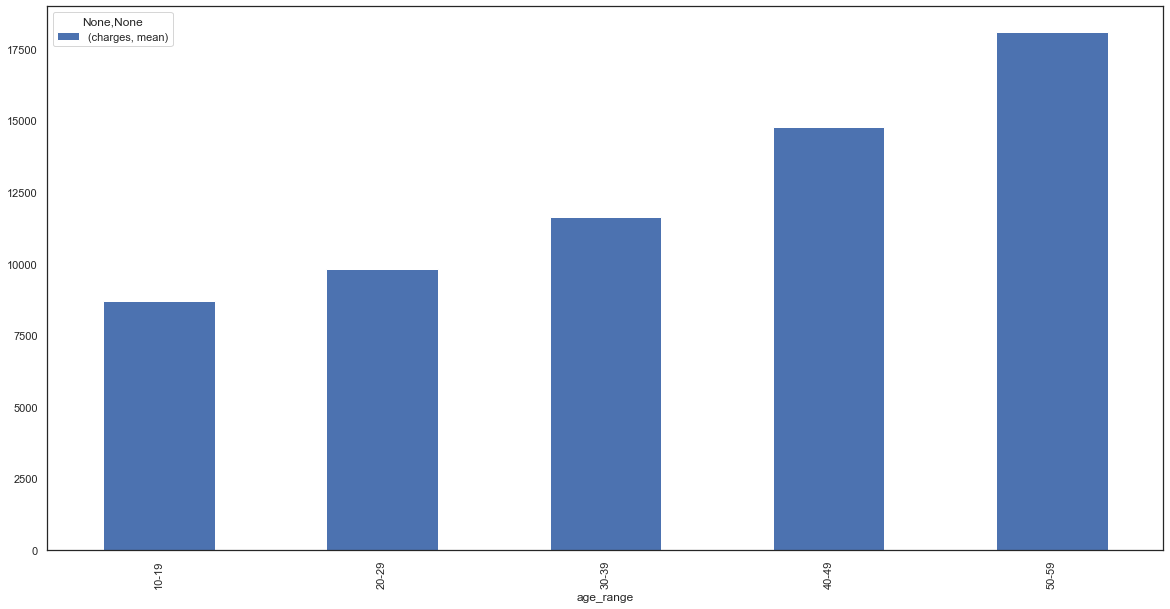

In [145]:
# BASIC BAR CHART

insurance_df[['age_range','charges']].groupby(['age_range']).agg(["mean"]).sort_values("age_range",ascending=True).plot.bar()

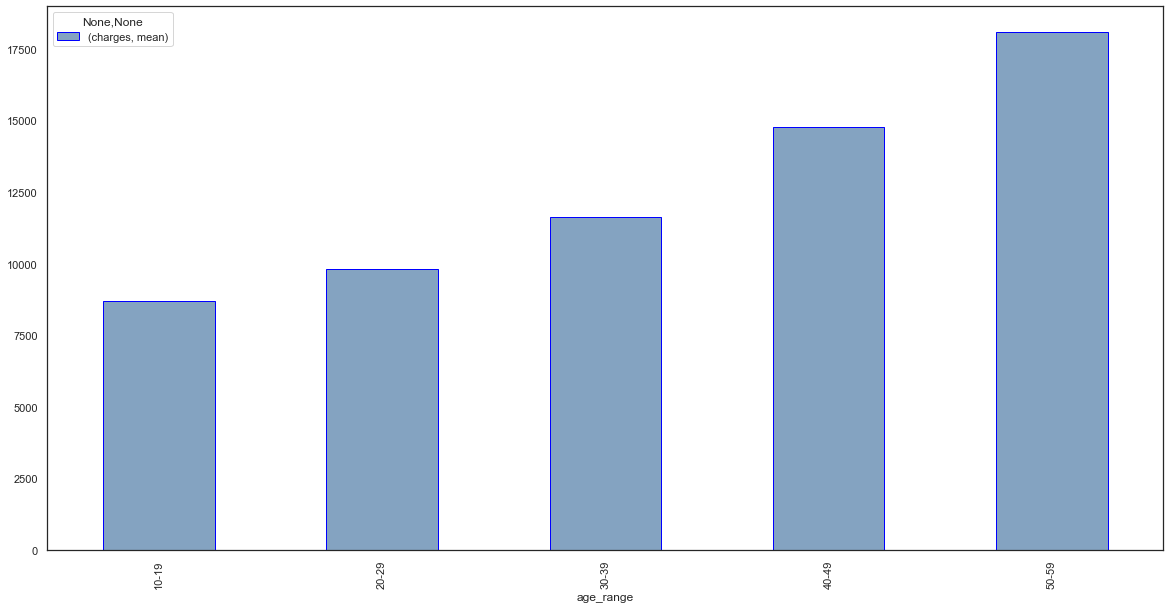

In [144]:
# ADDED SIMPLE STYLES 'color' AND 'edgecolor'

insurance_df[['age_range','charges']].groupby(['age_range']).agg(["mean"]).sort_values("age_range",ascending=True).plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')

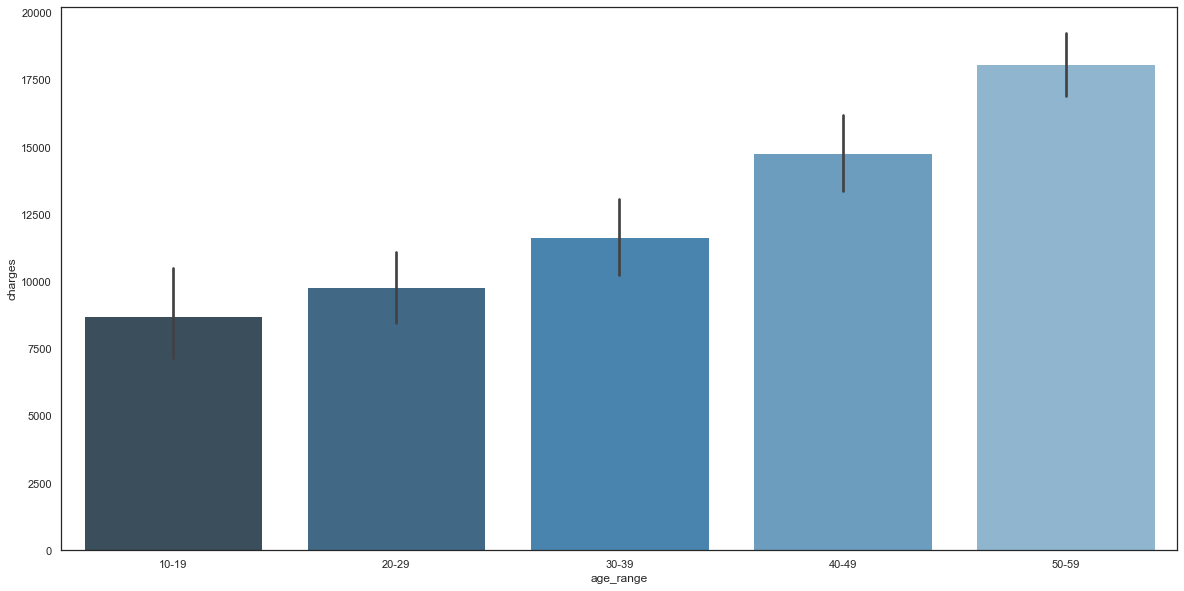

In [132]:
# USED SEABORN MODULE FOR PRETTY STYLING

sns.barplot(insurance_df['age_range'], insurance_df['charges'], palette='Blues_d')

sex     age_range
female  10-19        6.353507e+05
        20-29        1.210233e+06
        30-39        1.381113e+06
        40-49        1.932868e+06
        50-59        3.161497e+06
male    10-19        8.110873e+05
        20-29        1.515842e+06
        30-39        1.610189e+06
        40-49        2.220886e+06
        50-59        3.276759e+06
Name: charges, dtype: float64


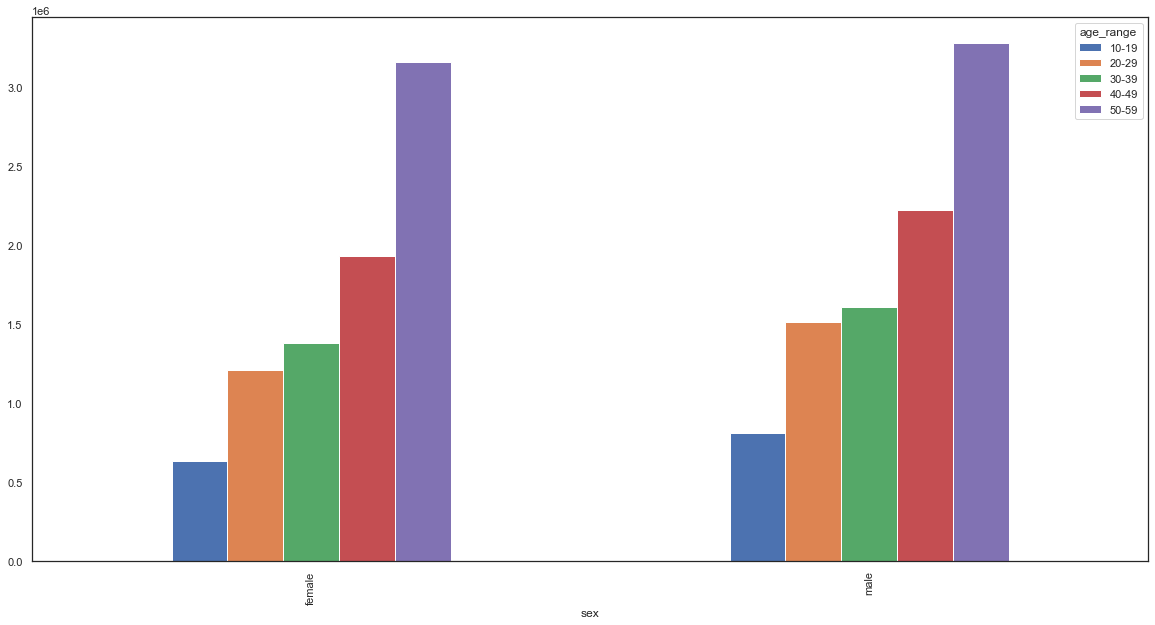

In [189]:
# SUM OF CHARGES BASED ON SEX AND AGE_RANGE

df1 = insurance_df.groupby(["sex","age_range"]).sum()["charges"]
print(df1) 

# PLOT DATA - BASIC BAR CHART 
# USED 'unstack()' TO USE VARIABLES AFTER GROUPBY

insurance_df.groupby(['sex','age_range']).sum()['charges'].unstack().plot.bar()

      sex age_range       charges
0  female     10-19  6.353507e+05
1  female     20-29  1.210233e+06
2  female     30-39  1.381113e+06
3  female     40-49  1.932868e+06
4  female     50-59  3.161497e+06
5    male     10-19  8.110873e+05
6    male     20-29  1.515842e+06
7    male     30-39  1.610189e+06
8    male     40-49  2.220886e+06
9    male     50-59  3.276759e+06


Text(0.5, 1.0, 'Grouped Barplot')

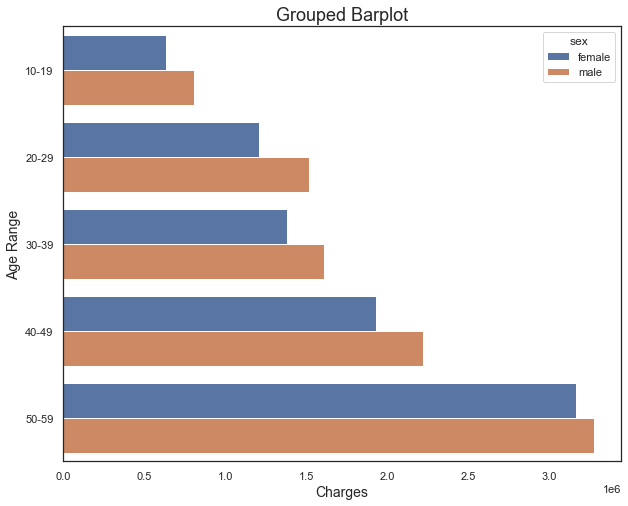

In [188]:
df_2 = insurance_df.groupby(['sex','age_range']).sum()['charges']
df_2 =df_2.reset_index()
print(df_2)

# PLOT DATA - BAR CHART USING SEABORN

plt.figure(figsize=(10, 8))
sns.barplot(x="charges", y="age_range", hue="sex", data=df_2)
plt.ylabel("Age Range", size=14)
plt.xlabel("Charges", size=14)
plt.title("Grouped Barplot", size=18)
